In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Context
This is a youtuber's channel dataset, who has now more than 700k subscribers.
When she at first opened her own channel, she had to struggle with how to attract more subscribers or to maximize monetizing from her channel. I hope this dataset is useful for someone else who wants to learn ML and Data Analysis.

Interest & Inspirations
Is it possible to predict a daily revenue of a certain youtuber with his/her channel's daily view, subscribers gained, average viewed duration, etc…?
Can I build a model predicting daily(monthly) revenue or daily gained subscribers using only views, the number of subscribers, likes, dislikes, comments, etc like factors we can get easily on one's youtube channel?
Which factor is most related with increasing daily Revenue?

Challenging : figure out what does some features really mean.
'Negative subcribers': youtube regularly verify the legitimacy of accounts and actions on your youtube channel. and that inclues checking the validity of your subcribers -> like auditing
# metrics to know
#https://support.google.com/youtube/answer/9314486?hl=en#:~:text=How%20many%20times%20your%20thumbnails,within%20the%20selected%20date%20range.
#https://blog.hubspot.com/marketing/youtube-analytics

'This Video Has NEGATIVE Likes?' : Recently I found a video with negative likes, basically it is something that can happen after you like a video with 0 likes then take the like away by tapping on it again. Something with how youtube validates likes causes this. To prevent spam bots taking over youtube

LOAD DATA & EDA

There are 3 dataset 2018, 2019 and 2020

In [16]:
data_18 = pd.read_csv('C:\\Users\\17144\\Documents\\DS\\SAURABH\\projects\\regression\\youtube\\Table data 2018.csv')
data_18.head()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
0,Total,0.0000,0,11.50,101420,165,50,94.05,31,41,379,490,29.58,6.0,11.0,338,15053,519.9035,0:02:04,0
1,2018-08-21,1.1538,13,7.38,122,2,1,100.00,0,0,5,5,53.59,1.0,1.0,5,15,0.4666,0:01:51,0
2,2018-08-22,1.1935,31,23.14,121,3,0,100.00,0,2,6,4,44.58,NaN,NaN,4,37,0.9575,0:01:33,0
3,2018-08-23,1.3684,19,20.65,92,1,0,100.00,0,0,2,5,38.75,NaN,NaN,2,26,0.5849,0:01:20,0
4,2018-08-24,1.0000,8,13.64,44,0,0,NaN,0,0,0,0,24.81,NaN,NaN,0,8,0.1152,0:00:51,0


In [17]:
data_18.tail()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
129,2018-12-27,1.5000,148,10.09,1694,1,1,100.00,0,0,5,6,23.54,NaN,NaN,5,222,6.9831,0:01:53,0
130,2018-12-28,1.5333,150,10.88,1618,1,0,100.00,0,0,4,3,20.76,NaN,NaN,4,230,6.4347,0:01:40,0
131,2018-12-29,1.5287,244,11.42,2268,7,1,100.00,0,0,4,7,22.94,NaN,NaN,4,373,11.4606,0:01:50,0
132,2018-12-30,1.5882,221,11.06,2360,2,0,93.33,1,1,13,14,23.80,NaN,NaN,12,351,11.1318,0:01:54,0
133,2018-12-31,1.5362,207,10.62,1939,1,0,100.00,0,0,8,7,23.01,NaN,NaN,8,318,9.7279,0:01:50,0


In [18]:
data_18.shape

(134, 20)

In [21]:
data_19 = pd.read_csv('C:\\Users\\17144\\Documents\\DS\\SAURABH\\projects\\regression\\youtube\\Table data 2019.csv')
data_19.head()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
0,Total,0.0000,0.0,4.58,1.223416e+09,311307.0,168500.0,98.64,56657.0,206404.0,907386.0,4100995.0,35.66,126.0,175.0,700982.0,75465700.0,5.744314e+06,0:04:34,29631.538
1,2019-01-01,1.4639,263.0,10.18,2.534000e+03,8.0,0.0,100.00,0.0,0.0,6.0,23.0,19.90,1.0,1.0,6.0,385.0,1.266780e+01,0:01:58,0.000
2,2019-01-02,1.6851,362.0,10.81,4.081000e+03,10.0,1.0,95.00,1.0,1.0,6.0,19.0,20.94,NaN,NaN,5.0,610.0,2.734750e+01,0:02:41,0.000
3,2019-01-03,1.7042,409.0,11.49,4.395000e+03,6.0,2.0,100.00,0.0,0.0,21.0,29.0,18.70,NaN,NaN,21.0,697.0,2.600880e+01,0:02:14,0.000
4,2019-01-04,1.7120,368.0,12.22,3.774000e+03,8.0,0.0,89.47,2.0,2.0,16.0,17.0,19.58,NaN,NaN,14.0,630.0,2.620280e+01,0:02:29,0.000


In [22]:
data_19.tail()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
497,2020-05-11,1.6376,6219.0,5.73,128335.0,56.0,49.0,98.86,7.0,38.0,224.0,606.0,28.03,0.0,0.0,186.0,10184.0,570.5379,0:03:21,1.649
498,2020-05-12,1.7221,4847.0,6.09,99658.0,36.0,29.0,98.47,7.0,35.0,230.0,450.0,28.19,0.0,0.0,195.0,8347.0,465.9996,0:03:20,1.217
499,2020-05-13,1.8082,4733.0,6.19,100656.0,61.0,56.0,98.25,8.0,39.0,280.0,450.0,26.76,0.0,0.0,241.0,8558.0,453.3748,0:03:10,2.228
500,2020-05-14,1.7337,4582.0,6.13,95347.0,39.0,27.0,99.07,4.0,29.0,226.0,425.0,26.88,0.0,0.0,197.0,7944.0,419.6403,0:03:10,0.982
501,Show­ing top 500 res­ults,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data_19.shape

(502, 20)

In [25]:
data_20 = pd.read_csv('C:\\Users\\17144\\Documents\\DS\\SAURABH\\projects\\regression\\youtube\\Table data 2020.csv')
data_20.head()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
0,Total,0.0000,0.0,4.51,1.194713e+09,298430.0,162014.0,98.66,54174.0,200304.0,863740.0,4003186.0,35.95,87.0,129.0,663436.0,72661114.0,5.615796e+06,0:04:38,28632.987
1,2020-05-15,1.7097,4667.0,6.05,9.428700e+04,38.0,22.0,98.07,8.0,42.0,261.0,407.0,26.32,0.0,0.0,219.0,7979.0,4.268278e+02,0:03:12,1.112
2,2020-05-16,1.7084,6793.0,6.41,1.306750e+05,206.0,52.0,99.14,9.0,66.0,278.0,1037.0,26.96,1.0,1.0,212.0,11605.0,6.222458e+02,0:03:13,1.610
3,2020-05-17,1.6535,7131.0,5.50,1.578670e+05,87.0,46.0,99.00,7.0,53.0,334.0,693.0,25.02,0.0,0.0,281.0,11791.0,5.950406e+02,0:03:01,1.343
4,2020-05-18,1.7130,6004.0,5.86,1.264240e+05,56.0,41.0,98.42,8.0,34.0,373.0,498.0,25.38,0.0,0.0,339.0,10285.0,5.285037e+02,0:03:04,1.063


In [26]:
data_20.tail()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
497,2021-09-23,1.8941,215712.0,5.83,4854638.0,2741.0,764.0,99.10,312.0,1221.0,2953.0,34422.0,30.35,1.0,4.0,1732.0,408582.0,19855.7704,0:02:54,163.558
498,2021-09-24,2.1319,305881.0,6.08,7768271.0,4741.0,1055.0,99.09,521.0,1520.0,4804.0,56677.0,47.81,1.0,0.0,3284.0,652105.0,54463.2654,0:05:00,397.066
499,2021-09-25,2.3468,152920.0,4.51,5788014.0,671.0,633.0,98.53,276.0,1112.0,3555.0,18458.0,41.24,0.0,0.0,2443.0,358868.0,26757.4077,0:04:28,178.664
500,2021-09-26,2.3480,132573.0,4.24,5375782.0,527.0,555.0,98.73,191.0,1042.0,3194.0,14857.0,39.27,0.0,0.0,2152.0,311277.0,22117.2441,0:04:15,135.841
501,Show­ing top 500 res­ults,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data_20.shape

(502, 20)

In [28]:
#all 3 datasets has the first line is total - should be removed
#data_19 and data_20 have last line is just a comment and has no values in all columns - should be removed

In [31]:
data_18= pd.read_csv('C:\\Users\\17144\\Documents\\DS\\SAURABH\\projects\\regression\\youtube\\Table data 2018.csv')[1:]
data_19 = pd.read_csv('C:\\Users\\17144\\Documents\\DS\\SAURABH\\projects\\regression\\youtube\\Table data 2019.csv')[1:-1]
data_20 = pd.read_csv('C:\\Users\\17144\\Documents\\DS\\SAURABH\\projects\\regression\\youtube\\Table data 2020.csv')[1:-1]

In [32]:
data_18.head()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
1,2018-08-21,1.1538,13,7.38,122,2,1,100.0,0,0,5,5,53.59,1.0,1.0,5,15,0.4666,0:01:51,0
2,2018-08-22,1.1935,31,23.14,121,3,0,100.0,0,2,6,4,44.58,NaN,NaN,4,37,0.9575,0:01:33,0
3,2018-08-23,1.3684,19,20.65,92,1,0,100.0,0,0,2,5,38.75,NaN,NaN,2,26,0.5849,0:01:20,0
4,2018-08-24,1.0000,8,13.64,44,0,0,NaN,0,0,0,0,24.81,NaN,NaN,0,8,0.1152,0:00:51,0
5,2018-08-25,1.0625,16,13.89,72,0,0,NaN,0,0,1,0,45.50,NaN,NaN,1,17,0.4491,0:01:35,0


In [33]:
data_19.tail()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
496,2020-05-10,1.6069,7215.0,6.27,130877.0,159.0,48.0,99.08,10.0,54.0,242.0,1081.0,30.40,1.0,1.0,188.0,11594.0,708.7736,0:03:40,2.959
497,2020-05-11,1.6376,6219.0,5.73,128335.0,56.0,49.0,98.86,7.0,38.0,224.0,606.0,28.03,0.0,0.0,186.0,10184.0,570.5379,0:03:21,1.649
498,2020-05-12,1.7221,4847.0,6.09,99658.0,36.0,29.0,98.47,7.0,35.0,230.0,450.0,28.19,0.0,0.0,195.0,8347.0,465.9996,0:03:20,1.217
499,2020-05-13,1.8082,4733.0,6.19,100656.0,61.0,56.0,98.25,8.0,39.0,280.0,450.0,26.76,0.0,0.0,241.0,8558.0,453.3748,0:03:10,2.228
500,2020-05-14,1.7337,4582.0,6.13,95347.0,39.0,27.0,99.07,4.0,29.0,226.0,425.0,26.88,0.0,0.0,197.0,7944.0,419.6403,0:03:10,0.982


In [34]:
#what columns we have
data_18.columns

Index(['Date', 'Av­er­age views per view­er', 'Unique view­ers',
       'Im­pres­sions click-through rate (%)', 'Im­pres­sions',
       'Com­ments ad­ded', 'Shares', 'Likes (vs. dis­likes) (%)', 'Dis­likes',
       'Sub­scribers lost', 'Sub­scribers gained', 'Likes',
       'Av­er­age per­cent­age viewed (%)', 'Videos pub­lished',
       'Videos ad­ded', 'Sub­scribers', 'Views', 'Watch time (hours)',
       'Av­er­age view dur­a­tion', 'Your es­tim­ated rev­en­ue (USD)'],
      dtype='object')

In [35]:
# 'Your estimated revenue' is target

In [37]:
# Features' insight
#average percentage viewed: Average percentage viewed is the percent of each video the average viewer watched. 
#It measures your video’s ability to hold viewers’ attention for its entirety. 
#And when YouTube realizes your videos can hold people’s attention, they’ll reward it with higher search and recommendation rankings.
# You can find this metric in your watch time report.

In [39]:
df = pd.concat([data_18, data_19, data_20])
df.head()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
1,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,100.0,0.0,0.0,5.0,5.0,53.59,1.0,1.0,5.0,15.0,0.4666,0:01:51,0.0
2,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,100.0,0.0,2.0,6.0,4.0,44.58,NaN,NaN,4.0,37.0,0.9575,0:01:33,0.0
3,2018-08-23,1.3684,19.0,20.65,92.0,1.0,0.0,100.0,0.0,0.0,2.0,5.0,38.75,NaN,NaN,2.0,26.0,0.5849,0:01:20,0.0
4,2018-08-24,1.0000,8.0,13.64,44.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,24.81,NaN,NaN,0.0,8.0,0.1152,0:00:51,0.0
5,2018-08-25,1.0625,16.0,13.89,72.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,45.50,NaN,NaN,1.0,17.0,0.4491,0:01:35,0.0


In [41]:
#data_18.isnull().sum()

In [42]:
#data_18.isnull().sum()/data_18.shape[0]*100

In [43]:
#data_19.isnull().sum()/data_19.shape[0]*100

In [44]:
#data_20.isnull().sum()/data_20.shape[0]*100

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1133 entries, 1 to 500
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  1133 non-null   object 
 1   Av­er­age views per view­er           1133 non-null   float64
 2   Unique view­ers                       1133 non-null   float64
 3   Im­pres­sions click-through rate (%)  1133 non-null   float64
 4   Im­pres­sions                         1133 non-null   float64
 5   Com­ments ad­ded                      1133 non-null   float64
 6   Shares                                1133 non-null   float64
 7   Likes (vs. dis­likes) (%)             1096 non-null   float64
 8   Dis­likes                             1133 non-null   float64
 9   Sub­scribers lost                     1133 non-null   float64
 10  Sub­scribers gained                   1133 non-null   float64
 11  Likes             

In [47]:
df.head(2)

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
1,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,100.0,0.0,0.0,5.0,5.0,53.59,1.0,1.0,5.0,15.0,0.4666,0:01:51,0.0
2,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,100.0,0.0,2.0,6.0,4.0,44.58,NaN,NaN,4.0,37.0,0.9575,0:01:33,0.0


In [48]:
df = df.drop(columns=['Date'], axis=1)

In [49]:
df.head(2)

,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
1,1.1538,13.0,7.38,122.0,2.0,1.0,100.0,0.0,0.0,5.0,5.0,53.59,1.0,1.0,5.0,15.0,0.4666,0:01:51,0.0
2,1.1935,31.0,23.14,121.0,3.0,0.0,100.0,0.0,2.0,6.0,4.0,44.58,NaN,NaN,4.0,37.0,0.9575,0:01:33,0.0


In [50]:
df.shape

(1133, 19)

Check NAN values

In [51]:
df.isnull().sum()/df.shape[0]*100

Av­er­age views per view­er              0.000000
Unique view­ers                          0.000000
Im­pres­sions click-through rate (%)     0.000000
Im­pres­sions                            0.000000
Com­ments ad­ded                         0.000000
Shares                                   0.000000
Likes (vs. dis­likes) (%)                3.265666
Dis­likes                                0.000000
Sub­scribers lost                        0.000000
Sub­scribers gained                      0.000000
Likes                                    0.000000
Av­er­age per­cent­age viewed (%)        0.000000
Videos pub­lished                       12.533098
Videos ad­ded                           12.533098
Sub­scribers                             0.000000
Views                                    0.000000
Watch time (hours)                       0.000000
Av­er­age view dur­a­tion                0.000000
Your es­tim­ated rev­en­ue (USD)         0.000000
dtype: float64

In [52]:
# it looks quite good. There are 3 columns have null values and the ratio was not too high.
# They are Videos published, Videos added and Likes (vs. dislikes) (%)

FILL NULL DATA

In [53]:
#check data values type
list(df['Videos ad­ded'].unique())

[1.0, nan, 2.0, 4.0, 0.0, 3.0]

In [54]:
# because the data type of Videos published is discrete, I checked value_counts to see which data value frequently occurs
df['Videos ad­ded'].value_counts(dropna= False)

0.0    854
NaN    142
1.0    113
2.0     17
3.0      4
4.0      3
Name: Videos ad­ded, dtype: int64

In [55]:
#fill nan values in Videos added columns with 0.0
df['Videos ad­ded']= df['Videos ad­ded'].fillna(df['Videos ad­ded'].mode()[0]) 

In [56]:
df['Videos ad­ded'].isnull().any()

False

In [57]:
list(df['Videos pub­lished'].unique())

[1.0, nan, 0.0, 3.0, 2.0]

In [58]:
# because the data type of Videos published is discrete, I checked value_counts to see which data value frequently occurs
df['Videos pub­lished'].value_counts(dropna= False)

0.0    869
NaN    142
1.0    120
2.0      1
3.0      1
Name: Videos pub­lished, dtype: int64

In [59]:
df['Videos pub­lished']= df['Videos pub­lished'].fillna(df['Videos pub­lished'].mode()[0])

In [60]:
df['Videos pub­lished'].isnull().any()

False

In [61]:
list(df['Likes (vs. dis­likes) (%)'].unique())

[100.0,
 nan,
 0.0,
 66.67,
 92.86,
 83.33,
 50.0,
 78.57,
 81.25,
 87.1,
 90.0,
 75.0,
 80.0,
 93.55,
 93.33,
 95.0,
 89.47,
 96.0,
 97.06,
 94.94,
 96.2,
 97.73,
 97.14,
 97.33,
 96.57,
 96.76,
 94.12,
 94.52,
 95.56,
 95.12,
 95.93,
 97.51,
 96.68,
 96.18,
 99.71,
 99.21,
 99.03,
 99.3,
 97.85,
 98.78,
 98.98,
 95.96,
 95.83,
 98.46,
 97.66,
 99.13,
 97.21,
 99.22,
 93.94,
 98.23,
 97.24,
 99.19,
 99.02,
 93.51,
 98.92,
 99.44,
 98.56,
 97.62,
 99.12,
 98.44,
 97.13,
 97.48,
 97.92,
 94.72,
 98.63,
 97.64,
 98.15,
 96.53,
 99.04,
 97.59,
 98.2,
 99.14,
 96.15,
 97.76,
 98.05,
 91.86,
 96.23,
 98.29,
 96.58,
 97.94,
 98.33,
 96.34,
 96.73,
 95.99,
 95.01,
 96.36,
 96.07,
 97.22,
 95.1,
 93.84,
 96.32,
 99.34,
 98.11,
 98.02,
 97.39,
 97.44,
 96.81,
 99.01,
 96.42,
 96.97,
 96.95,
 99.39,
 96.24,
 94.74,
 92.55,
 98.65,
 95.22,
 98.26,
 97.93,
 95.71,
 96.67,
 99.24,
 98.4,
 96.69,
 97.69,
 93.75,
 95.18,
 95.24,
 95.06,
 98.76,
 98.19,
 98.06,
 94.57,
 98.43,
 97.86,
 96.64,
 96.08,


In [62]:
df['Likes (vs. dis­likes) (%)'].fillna(df['Likes (vs. dis­likes) (%)'].mean(), inplace=True)

In [63]:
df['Likes (vs. dis­likes) (%)'].isnull().any()

False

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Av­er­age views per view­er,1133.0,1.627153,3.257080e-01,1.0000,1.427300,1.5565,1.7911,2.615800e+00
Unique view­ers,1133.0,25374.493380,5.489125e+04,8.0000,456.000000,4106.0000,18074.0000,4.822540e+05
Im­pres­sions click-through rate (%),1133.0,6.572215,2.248887e+00,3.5200,5.170000,6.1100,7.1300,2.314000e+01
Im­pres­sions,1133.0,832825.096205,1.878023e+06,44.0000,8460.000000,68850.0000,398048.0000,1.632350e+07
Com­ments ad­ded,1133.0,223.922330,7.367177e+02,0.0000,2.000000,28.0000,128.0000,1.158200e+04
Shares,1133.0,122.927626,3.338523e+02,0.0000,2.000000,22.0000,87.0000,6.513000e+03
Likes (vs. dis­likes) (%),1133.0,97.129763,7.075696e+00,0.0000,97.129763,98.2400,99.1900,1.166700e+02
Dis­likes,1133.0,39.359223,8.146669e+01,-1.0000,0.000000,6.0000,31.0000,6.640000e+02
Sub­scribers lost,1133.0,137.324801,2.994564e+02,0.0000,6.000000,23.0000,94.0000,2.177000e+03
Sub­scribers gained,1133.0,644.599294,1.352182e+03,0.0000,12.000000,151.0000,516.0000,1.247400e+04


#There are 3 columns that has negative values namely Dislikes, Subscribers, and Likes
- after get inforamation from the site, negative values because youtube took out these feature. The reason is they verify the accounts
-I decided to keep negative values for these columns, because I think it effects the result

In [67]:
df['Dis­likes'][df['Dis­likes']<0]

264   -1.0
Name: Dis­likes, dtype: float64

In [68]:
len(df['Dis­likes'][df['Dis­likes']<0])

1

DETECT OUTLIERS

In [69]:
#df.boxplot() #this will plot all numberic columns

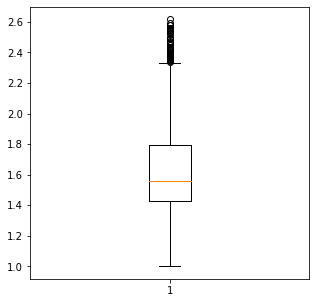

In [70]:
fig= plt.figure(figsize= (5,5))
plt.boxplot(df['Av­er­age views per view­er'])
plt.show()

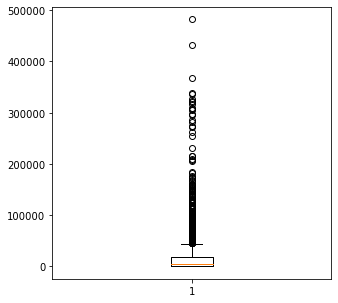

In [71]:
fig= plt.figure(figsize= (5,5))
plt.boxplot(df['Unique view­ers'])
plt.show()

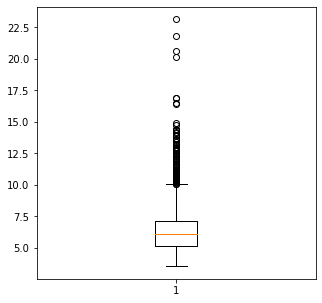

In [77]:
fig= plt.figure(figsize= (5,5))
plt.boxplot(df['Im­pres­sions click-through rate (%)'])
plt.show()

# key point is here
- count ACCUMULATE subscribers and plot accumulated Subcribers vs. Revenue

In [78]:
subs= df['Sub­scribers'].values.tolist()
subs_accumulated =[]
count=0
for s in subs:
    count +=s
    subs_accumulated.append(count)

In [79]:
df['subs_accumulated'] = subs_accumulated
df.head(2)

,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD),subs_accumulated
1,1.1538,13.0,7.38,122.0,2.0,1.0,100.0,0.0,0.0,5.0,5.0,53.59,1.0,1.0,5.0,15.0,0.4666,0:01:51,0.0,5.0
2,1.1935,31.0,23.14,121.0,3.0,0.0,100.0,0.0,2.0,6.0,4.0,44.58,0.0,0.0,4.0,37.0,0.9575,0:01:33,0.0,9.0


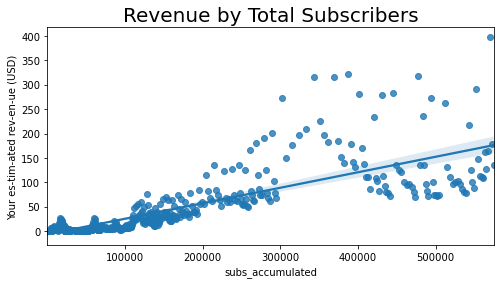

In [80]:
# regplot() : This method is used to plot data and a linear regression model fit. 
plt.figure(figsize=(8,4))
sns.regplot(data=df, x='subs_accumulated', y='Your es­tim­ated rev­en­ue (USD)')
plt.title('Revenue by Total Subscribers', fontsize=20)
plt.show()

EXLORING COLLINEARITY 
since we have to find out which factor is LEAST related with increasing daily Revenue? so we should detect collinearity

In [81]:
data = pd.DataFrame(data= df)

In [85]:
corr_ = data.corr()
#corr_

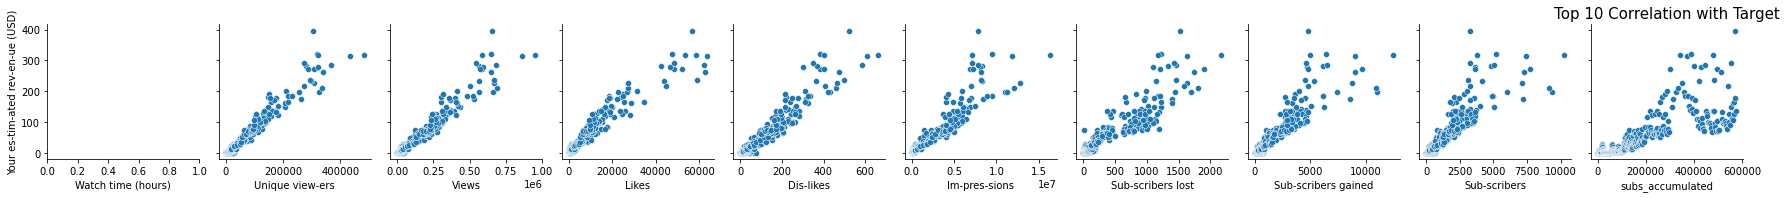

In [86]:
#top 10 correlation with target
top_corr = data.corr()['Your es­tim­ated rev­en­ue (USD)'].sort_values(ascending= False).reset_index()['index'][:11].values

sns.pairplot(df[top_corr], x_vars= top_corr[1:], y_vars= top_corr[0])
plt.title('Top 10 Correlation with Target', fontsize = 15)
plt.show()

In [87]:
#correlattion ascending order
corr_order= data[data.columns[1:]].corr()['Your es­tim­ated rev­en­ue (USD)'][:]
corr_order.sort_values(ascending= True)

Im­pres­sions click-through rate (%)   -0.323114
Likes (vs. dis­likes) (%)               0.082509
Videos ad­ded                           0.214242
Videos pub­lished                       0.336405
Av­er­age per­cent­age viewed (%)       0.530411
Shares                                  0.812992
Com­ments ad­ded                        0.830642
subs_accumulated                        0.834788
Sub­scribers                            0.907318
Sub­scribers gained                     0.923737
Sub­scribers lost                       0.934129
Im­pres­sions                           0.941691
Dis­likes                               0.963716
Likes                                   0.964732
Views                                   0.976549
Unique view­ers                         0.978715
Watch time (hours)                      0.984516
Your es­tim­ated rev­en­ue (USD)        1.000000
Name: Your es­tim­ated rev­en­ue (USD), dtype: float64

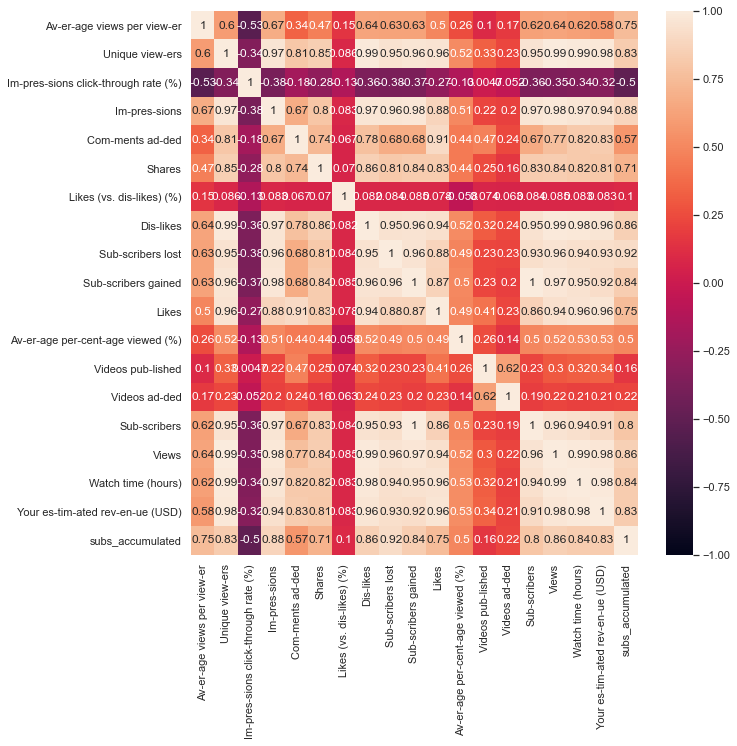

In [88]:
sns.set(rc={'figure.figsize':(10,10)})
df_heatmap= sns.heatmap(data.corr(),vmax=1, vmin=-1, annot= True)
plt.show()

In [ ]:
#check for the top 10 correllations among features
corr = data_X.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[21:31] # since there are 20 features, so we start from 21

there is a object columns it need to be handled 

In [ ]:
data['Av­er­age view dur­a­tion'].iloc[:4]

In [ ]:
data['Av­er­age view dur­a­tion'] = pd.to_timedelta(data['Av­er­age view dur­a­tion']).dt.seconds

In [ ]:
data['Av­er­age view dur­a­tion'].iloc[:4]

In [ ]:
data['Avg view duration'] = data['Av­er­age view dur­a­tion']

In [ ]:
#drop object column just keep numeric column
data = data.drop(data['Av­er­age view dur­a­tion'])

In [ ]:
# drop_cols variable to keep track dropped columns
drop_cols= ['Av­er­age views per view­er',
                      'Likes (vs. dis­likes) (%)', 
                      'Videos ad­ded','Videos pub­lished', 
                      'Av­er­age per­cent­age viewed (%)', 'Sub­scribers gained'] 

In [ ]:
data.drop(columns= drop_cols, axis= 1, inplace= True)

In [ ]:
data.shape

In [ ]:
data.info()

Split dataset into indepent features columns and target column

In [ ]:
data_X = data.iloc[:,:-1]
data_Y= data.iloc[:,-1:]

In [ ]:
scaler = StandardScaler()
data_X = scaler.fit_transform(data_X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state= 27)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
Y_train.shape

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# the number of predictor variables in a linear regression model is determined by adjusted R squared
# R2 indicates the proportion of data points which lie within the line created by the regression equation. 
# higher R2 for better result.
# use MAE for evalution becuase dataset has outliers
# mean_absolute_error, mean_squared_error lower is good, implies higher accuracy

In [ ]:
# function for evaluation model
def evaluation (model, y_test, y_predict):
    mae= mean_absolute_error (y_test, y_predict)
    rmse = mean_squared_error(y_test, y_predict) **0.5
    r2= r2_score(y_test,y_predict)
    print('*{} Result*'.format(model))
    print('='*50)
    print('MAE Score: ', mae)
    print('RMSE Score: ', rmse)
    print('R2 Score: ', r2)
    print()

 # Training model with LinearRegression

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

In [ ]:
print('Score:', round(lr_clf.score(X_test, y_test)*100,2), '%')

In [ ]:
linear_clf.fit(X_train, y_train)

In [ ]:
y_pred = np.exp(lr_clf.predict(X_test))
evaluation ('Linear Regression ', y_test, y_pred)

R2 in test is very low. Linear Regression Model is overfitting

# Train with Random Forest Regressor Model

In [ ]:
rf_clf =RandomForestRegressor (n_estimators = 500, n_jobs = 1, random_state=7)
rf_clf.fit(X_train, y_train)

In [ ]:
# accuracy of Random Forest Regressor
print('Random Forest R-squared Score:', round(rf_clf.score(X_test,y_test)*100,2),'%')

In [ ]:
# 
y_pred_rf = rf_clf.predict(X_test)
evaluation('Random Forest Regressor', y_test, y_pred_rf)

In [ ]:
plt.figure(figsize = (10,5))
x_ax = range(len(y_test)) 
plt.plot(x_ax, y_test, label="original") 
plt.plot(x_ax, y_pred_rf, label="predicted") 
plt.title("Youtube Revene and XGBRegession prediction") 
plt.legend() 
plt.show()

result in train and test is good

# Train with XGBRegressor

In [ ]:
xgb_clf = XGBRegressor(verbosity=0)
xgb_clf.fit(X_train, y_train)

In [ ]:
#training score
print('XGB training Score:', round(xgb_clf.score(X_train,y_train)*100,2),'%')

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
#cross validation on training 
scores = cross_val_score(xgb_clf, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

In [ ]:
# KFold method
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

In [ ]:
# validation the model in test set
xgb_y_pred = xgb_clf.predict(X_test)
xgb_predictions = [round(value) for value in xgb_y_pred] 

In [ ]:
evaluation(xgb_clf,y_test,xgb_predictions)

Result in train and test both is goood

Visualize original and predicted test data in plot to compare visually

In [ ]:
plt.figure(figsize = (10,5))
x_ax = range(len(y_test)) 
plt.plot(x_ax, y_test, label="original") 
plt.plot(x_ax, xgb_predictions, label="predicted") 
plt.title("Youtube Revene and XGBRegession prediction") 
plt.legend() 
plt.show()

insights from the projects
1/ understanding each features > Key : accumulate Sub-cribers
2/ decide which features need to drop and keep
3/ dealing with time duration -> solution: timedelta
4/ 